In [213]:
import pandas as pd
import re
import imdb
import time

ia = imdb.Cinemagoer()
df_director_films = pd.read_csv('Director_Movies_Clean.csv', encoding= 'utf-8-sig')
df_director_names = pd.read_csv('director_names.csv', encoding='unicode_escape')
kinds = {}

In [203]:
df_director_films

,Movie_ID,Title,Year,Person_ID,Name
0,3501074,Madam Secretary (2015-2017),0,151,Morgan Freeman
1,106464,Bopha!,1993,151,Morgan Freeman
2,995854,A Journal for Jordan,2021,243,Denzel Washington
3,2671706,Fences,2016,243,Denzel Washington
4,413573,Grey's Anatomy,2016,243,Denzel Washington
...,...,...,...,...,...
6606,8571700,Remembrance: A Portrait Study,1967,9913311,Edward Owens
6607,12127402,Autrefois J'ai aime une femme,1966,9913311,Edward Owens
6608,12666216,Sisters of the Screen - African Women in Cinema,1966,11720380,Beti Ellerson
6609,12666216,Sisters of the Screen - African Women in Cinema,2002,11720380,Beti Ellerson


Removed all Duplicates from Dataframe  

In [204]:
df_movies = df_director_films.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)


In [187]:
df_movies

,Movie_ID,Title,Year,Person_ID,Name
0,3501074,Madam Secretary (2015-2017),0,151,Morgan Freeman
1,106464,Bopha!,1993,151,Morgan Freeman
2,995854,A Journal for Jordan,2021,243,Denzel Washington
3,2671706,Fences,2016,243,Denzel Washington
4,413573,Grey's Anatomy,2016,243,Denzel Washington
...,...,...,...,...,...
6606,8571700,Remembrance: A Portrait Study,1967,9913311,Edward Owens
6607,12127402,Autrefois J'ai aime une femme,1966,9913311,Edward Owens
6608,12666216,Sisters of the Screen - African Women in Cinema,1966,11720380,Beti Ellerson
6609,12666216,Sisters of the Screen - African Women in Cinema,2002,11720380,Beti Ellerson


Remove all the movies with no year (possibly television shows)

In [8]:
df_movies = df_movies[df_movies.Year != 0]

In [10]:
df_movies.describe()

,Movie_ID,Year,Person_ID
count,5.699000e+03,5699.000000,5.699000e+03
mean,4.781896e+06,1998.656431,9.356992e+05
std,4.761429e+06,19.859445,1.235733e+06
min,1.187000e+04,1919.000000,1.510000e+02
25%,3.851770e+05,1991.000000,2.288530e+05
50%,3.223890e+06,2004.000000,6.085750e+05
75%,8.135978e+06,2014.000000,9.373060e+05
max,2.107769e+07,2027.000000,1.172038e+07


In [14]:
df_movies.loc[df_movies['Year'] == 2021]

,Movie_ID,Title,Year,Person_ID,Name
2,995854,A Journal for Jordan,2021,243,Denzel Washington
19,14324128,NYC Epicenters 9/11-2021ÃÂÃÂ½,2021,490,Spike Lee
185,13935770,Chris Rock Total Blackout: The Tamborine Exten...,2021,1674,Chris Rock
267,10608454,Harlem,2021,2700,Malcolm D. Lee
268,3554046,Space Jam: A New Legacy,2021,2700,Malcolm D. Lee
...,...,...,...,...,...
6487,12223626,Black Seeds: The History of Africans in America,2021,5679045,Bayer Mack
6529,8537542,Cold Blood,2021,6462306,Taylor Ri'chard
6541,13814666,Pursued,2021,7280958,Fathia Absie
6552,15596914,Voodoo,2021,7385237,Phillip Youmans


<AxesSubplot:xlabel='Title', ylabel='Year'>

c:\Users\Andronicus\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Andronicus\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


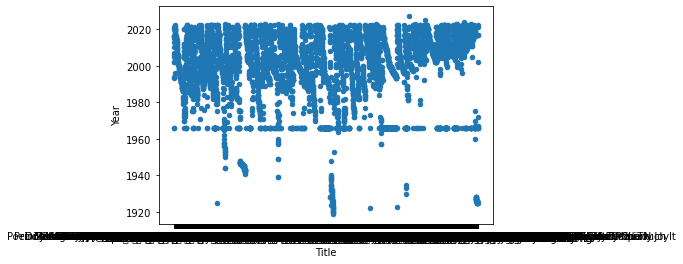

In [18]:
df_movies.plot(x = 'Title', y='Year', kind = 'scatter')

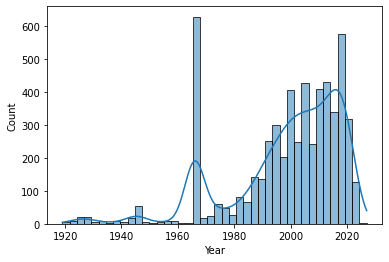

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_movies.Year, kde=True)
plt.show()

In [30]:
df_movies['Year'].describe()

count    5699.000000
mean     1998.656431
std        19.859445
min      1919.000000
25%      1991.000000
50%      2004.000000
75%      2014.000000
max      2027.000000
Name: Year, dtype: float64

In [205]:
def df_director_id(name: str):
    for director in df_movies.itertuples():
        if director.Name == name:
            return (str(director.Person_ID).zfill(7))

In [252]:
def movie_format(movie_id):
    if movie_id == None:
        return None
    
    if len(movie_id) > 1:
        return ', '.join(map(str, movie_id))
    else:
        return ' '.join(map(str, movie_id))


def movie_metascore(movie_id):
    return movie_id['metascore']


def movie_budget(movie_id):
    box_off = movie_id.get('box office', None)
    if box_off == None:
        return None
    else:
        budget = re.search('[0-9,]*\d', str(movie_id['box office']))
            
    return  budget.group(0)
    
#tstmovie = ia.get_movie('13972246', info=['main', 'critic_reviews', 'vote details', 'plot'])
#print(tstmovie['box office'])
#budget = re.search('[0-9,]*\d', '$1') #str(tstmovie['box office']))
#print(budget)
#print(movie_budget(tstmovie))
# print(movie_metascore(tstmovie))

In [ ]:
df_movies['Type'] = ""
df_movies['Genres'] = ""
df_movies['Metascore'] = ""
df_movies['Budget'] = ""
df_movies['Votes'] = ""
df_movies['Rating'] = ""
df_movies['Runtime'] = ""
df_movies

In [209]:
df_movies = df_movies.reset_index()

In [ ]:
df_movies.head(20)

In [253]:
#x = 0
for i in range (6049, 6316): #df_movies.itertuples():
    if i % 150 == 0:
        print(f"{df_movies['Movie_ID'][i]} and  {df_movies['Title'][i]}") 
        time.sleep(180) # 3 minutes
    movie = ia.get_movie(df_movies['Movie_ID'][i], info=['main', 'critic_reviews', 'vote details', 'plot']) #ia.get_movie(df_movies['Movie_ID'][i])
    df_movies.loc[i, 'Type']        = movie.get('kind', None)
    df_movies.loc[i, 'Runtime']     = movie_format(movie.get('runtime', None)) #movie.get('runtime', None)
    df_movies.loc[i, 'Rating']      = movie.get('rating', None)
    df_movies.loc[i, 'Votes']       = movie.get('votes', None)
    df_movies.loc[i, 'Genres']      = movie_format(movie.get('genres', None)) #str(movie.get('genres', None))
    df_movies.loc[i, 'Metascore']   = movie.get('metascore', None)
    df_movies.loc[i, 'Budget']      = movie_budget(movie)
    #x +=1

    #df_movies

    # if x == 10:
    #     break
#df_movies.head(10)        

9847438 and  Football Town: Cleveland Ohio
6340186 and  Film 13


In [254]:
df_movies.to_csv("Director_Movies_Analyze.csv", encoding='utf-8-sig')

In [ ]:
for Movie_ID in df_movies.columns[1:]:
    print(df_movies[Movie_ID])

In [19]:
spike_lee = ia.get_person('0000490')
sidney_poitier = ia.get_person('0001627')
tvshow = ia.get_movie('209093', info='critic_reviews')


In [42]:
print(f"{spike_lee['birth date']}  {spike_lee['height']} {spike_lee['birth info']} ")
print(f"{sidney_poitier['birth date']}  {sidney_poitier['height']} {sidney_poitier['birth info']} ")

1957-03-20  5' 7" (1.7 m) {'birth place': 'Atlanta, Georgia, USA'} 
1927-02-20  6' 2½" (1.89 m) {'birth place': 'Miami, Florida, USA'} 


In [20]:
tvshow.infoset2keys


{'critic_reviews': []}

In [152]:
mv = ia.get_movie('790770', info=['main', 'critic_reviews', 'vote details', 'plot'])
#metascore = ia.get_movie_critic_reviews('7349662')

In [404]:
def person_height_ft(person_id):
    person_height = person_id.get('height', None)
    print(person_height)
    if person_height == None:
        return None
    else:
        meter = re.search('[0-9\']+\s[0-9]+.?', str(person_height))
        height = re.search('\([0-9]+\.?[0-9]*', str(person_height))
        height = str(height.group(0)).replace('(','')
    return  meter.group(0)

tstperson = ia.get_person('0002700')
#str(director.Person_ID).zfill(7)
#print(tstmovie['box office'])
#budget = re.search('[0-9,]*\d', '$1') #str(tstmovie['box office']))
#print(budget)
birth_list = tstperson.get('birth info', None)
#city, state, country = str(birth_list['birth place']).split(", ")

#city, state, country = birth_list.split(',')
#print(tstperson['mini biography'])
#print(tstperson.get('height', None))
print(birth_list)
#print(f"{city} adfsfd {state} aerrod {country}")
#tstperson['birth info']
# print(movie_metascore(tstmovie))

{'birth place': 'USA'}


In [348]:
tstperson.infoset2keys

{'main': ['birth info', 'headshot', 'filmography', 'imdbID', 'name'],
 'biography': ['headshot',
  'birth name',
  'height',
  'mini biography',
  'trade mark',
  'trivia',
  'quotes',
  'birth date',
  'birth notes']}

In [403]:
df_director_names = pd.read_csv("director_names_analyze.csv", index_col=[0], encoding="utf-8-sig")

In [ ]:
for i in range (67, 311): #df_director_names.itertuples():
    if df_director_names['Person_ID'][i] == 0:
        continue
    if i % 100 == 0:
        print(f"{df_director_names['Person_ID'][i]} and  {df_director_names['Name'][i]}") 
        time.sleep(180) # 3 minutes
    director = ia.get_person(str(df_director_names['Person_ID'][i]).zfill(7)) 

    person_height = director.get('height', "")
    print(person_height)
    if person_height == "":
        height_m = height_ft = None
    else:    
        height_ft = re.search('[0-9\']*\s[0-9]*.?', str(person_height))
        height_ft = height_ft.group(0)
        height_m = re.search('\([0-9]+\.?[0-9]*', str(person_height))
        height_m = str(height_m.group(0)).replace('(','')
    
    birth_list = tstperson.get('birth info', "")
    if birth_list == "":
        birth_city = birth_state = birth_country = None
    else:
        birth_city, birth_state, birth_country = str(birth_list['birth place']).split(", ")
    
    df_director_names.loc[i, 'Birth Date']  = director.get('birth date', None)
    df_director_names.loc[i, 'Height ft']   = height_ft
    df_director_names.loc[i, 'Height m']    = height_m
    df_director_names.loc[i, 'Birth City']       = birth_city
    df_director_names.loc[i, 'Birth State']      =  birth_state
    df_director_names.loc[i, 'Birth Country']   =  birth_country
    df_director_names.loc[i, 'Headshot']   =  director.get('headshot', None)
    try:
        df_director_names.loc[i, 'Biography']   =  director.get('biography', None)
    except:
        df_director_names.loc[i, 'Biography'] = "Error"
        print("test")


In [ ]:
df_director_names['Birth Date'] = ""
df_director_names['Height ft'] = ""
df_director_names['Height m'] = ""
df_director_names['Birth City'] = ""
df_director_names['Birth State'] = ""
df_director_names['Birth Country'] = ""
df_director_names['Headshot'] = ""
df_director_names['Biography'] = ""
df_director_names

In [407]:
df_director_names.to_csv("director_names_analyze.csv", encoding='utf-8-sig')

In [406]:
for i in range (0, 311): #df_director_names.itertuples():
    if df_director_names['Person_ID'][i] == 0:
        continue
    # if i % 100 == 0:
    #     print(f"{df_director_names['Person_ID'][i]} and  {df_director_names['Name'][i]}") 
    #     time.sleep(180) # 3 minutes
    director = ia.get_person(str(df_director_names['Person_ID'][i]).zfill(7)) 

    # person_height = director.get('height', "")
    # print(person_height)
    # if person_height == "":
    #     height_m = height_ft = None
    # else:    
    #     height_ft = re.search('[0-9\']*\s[0-9]*.?', str(person_height))
    #     height_ft = height_ft.group(0)
    #     height_m = re.search('\([0-9]+\.?[0-9]*', str(person_height))
    #     height_m = str(height_m.group(0)).replace('(','')
    
    birth_list = director.get('birth info', None)
    if birth_list is None:
        birth_city = birth_state = birth_country = None    
    elif len((birth_list['birth place']).split(", ")) == 4:
        birth_city = None
        birth_city, city, birth_state, birth_country = str(birth_list['birth place']).split(", ") 
    elif len((birth_list['birth place']).split(", ")) == 2:
        birth_city = None
        birth_state, birth_country = str(birth_list['birth place']).split(", ")
    elif len((birth_list['birth place']).split(", ")) == 1:
        birth_city = birth_state = None
        birth_country = str(birth_list['birth place'])
    else:
        birth_city, birth_state, birth_country = str(birth_list['birth place']).split(", ")
        
            #birth_city = birth_state = birth_country = "Error"
    
    # df_director_names.loc[i, 'Birth Date']  = director.get('birth date', None)
    # df_director_names.loc[i, 'Height ft']   = height_ft
    # df_director_names.loc[i, 'Height m']    = height_m
    df_director_names.loc[i, 'Birth City']       = birth_city
    df_director_names.loc[i, 'Birth State']      =  birth_state
    df_director_names.loc[i, 'Birth Country']   =  birth_country
    # df_director_names.loc[i, 'Headshot']   =  director.get('headshot', None)
    # try:
    #     df_director_names.loc[i, 'Biography']   =  director.get('biography', None)
    # except:
    #     df_director_names.loc[i, 'Biography'] = "Error"
    #     print("test")